In [3]:
import networkx as nx
import random as rd
import numpy as np
import random
import matplotlib.pyplot as plt

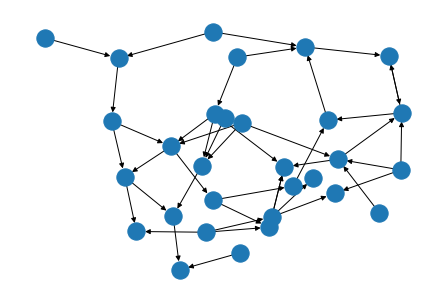

In [4]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [22]:
nx_pagerank=list(nx.pagerank(g).values())
print(nx_pagerank)

[0.01321914850756847, 0.04305614905051307, 0.0224184422385673, 0.020763573555365067, 0.1519409000092644, 0.015278038556628357, 0.04357199076624549, 0.08868962006965002, 0.009276594051426114, 0.027215223573378695, 0.009276594051426114, 0.009276594051426114, 0.009276594051426114, 0.021104257419853185, 0.023535500084085954, 0.009276594051426114, 0.018135203917936826, 0.009276594051426114, 0.01264966891920012, 0.05375946044542632, 0.009276594051426114, 0.011904963688854351, 0.15057445865003966, 0.02084377195458973, 0.025679331302227965, 0.02721686924658904, 0.0925438315518033, 0.009276594051426114, 0.009276594051426114, 0.03241025002937753]


In [8]:
N=1000
alpha=0.85
pagerank=[0] * 30
r_node = rd.choice(list(g.nodes))
print(pagerank)    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
for i in range(N):
    pagerank[r_node] += 1
    neighbors_nodes = list(g.neighbors(r_node))

    if len(neighbors_nodes) > 0 and random.random() < alpha:
        r_node = rd.choice(neighbors_nodes)
    else:
        r_node = rd.choice(list(g.nodes))

pagerank /= np.sum(pagerank)
print(pagerank)

[0.011 0.038 0.02  0.021 0.176 0.02  0.053 0.082 0.015 0.017 0.006 0.007
 0.006 0.014 0.019 0.01  0.02  0.009 0.011 0.045 0.013 0.018 0.163 0.019
 0.019 0.027 0.103 0.004 0.008 0.026]


In [23]:
N_range = np.arange(100, 10001, 100)
avg_err=[]
for N in N_range:
    
    alpha=0.85
    pagerank=[0] * 30
    r_node = rd.choice(list(g.nodes))
    
    for i in range(N):
        pagerank[r_node] += 1
        neighbors_nodes = list(g.neighbors(r_node))

        if len(neighbors_nodes) > 0 and random.random() < alpha:
            r_node = rd.choice(neighbors_nodes)
        else:
            r_node = rd.choice(list(g.nodes))

    pagerank = pagerank/np.sum(pagerank)
    avg_err.append(np.sqrt(np.sum((pagerank - nx_pagerank)**2)))
     

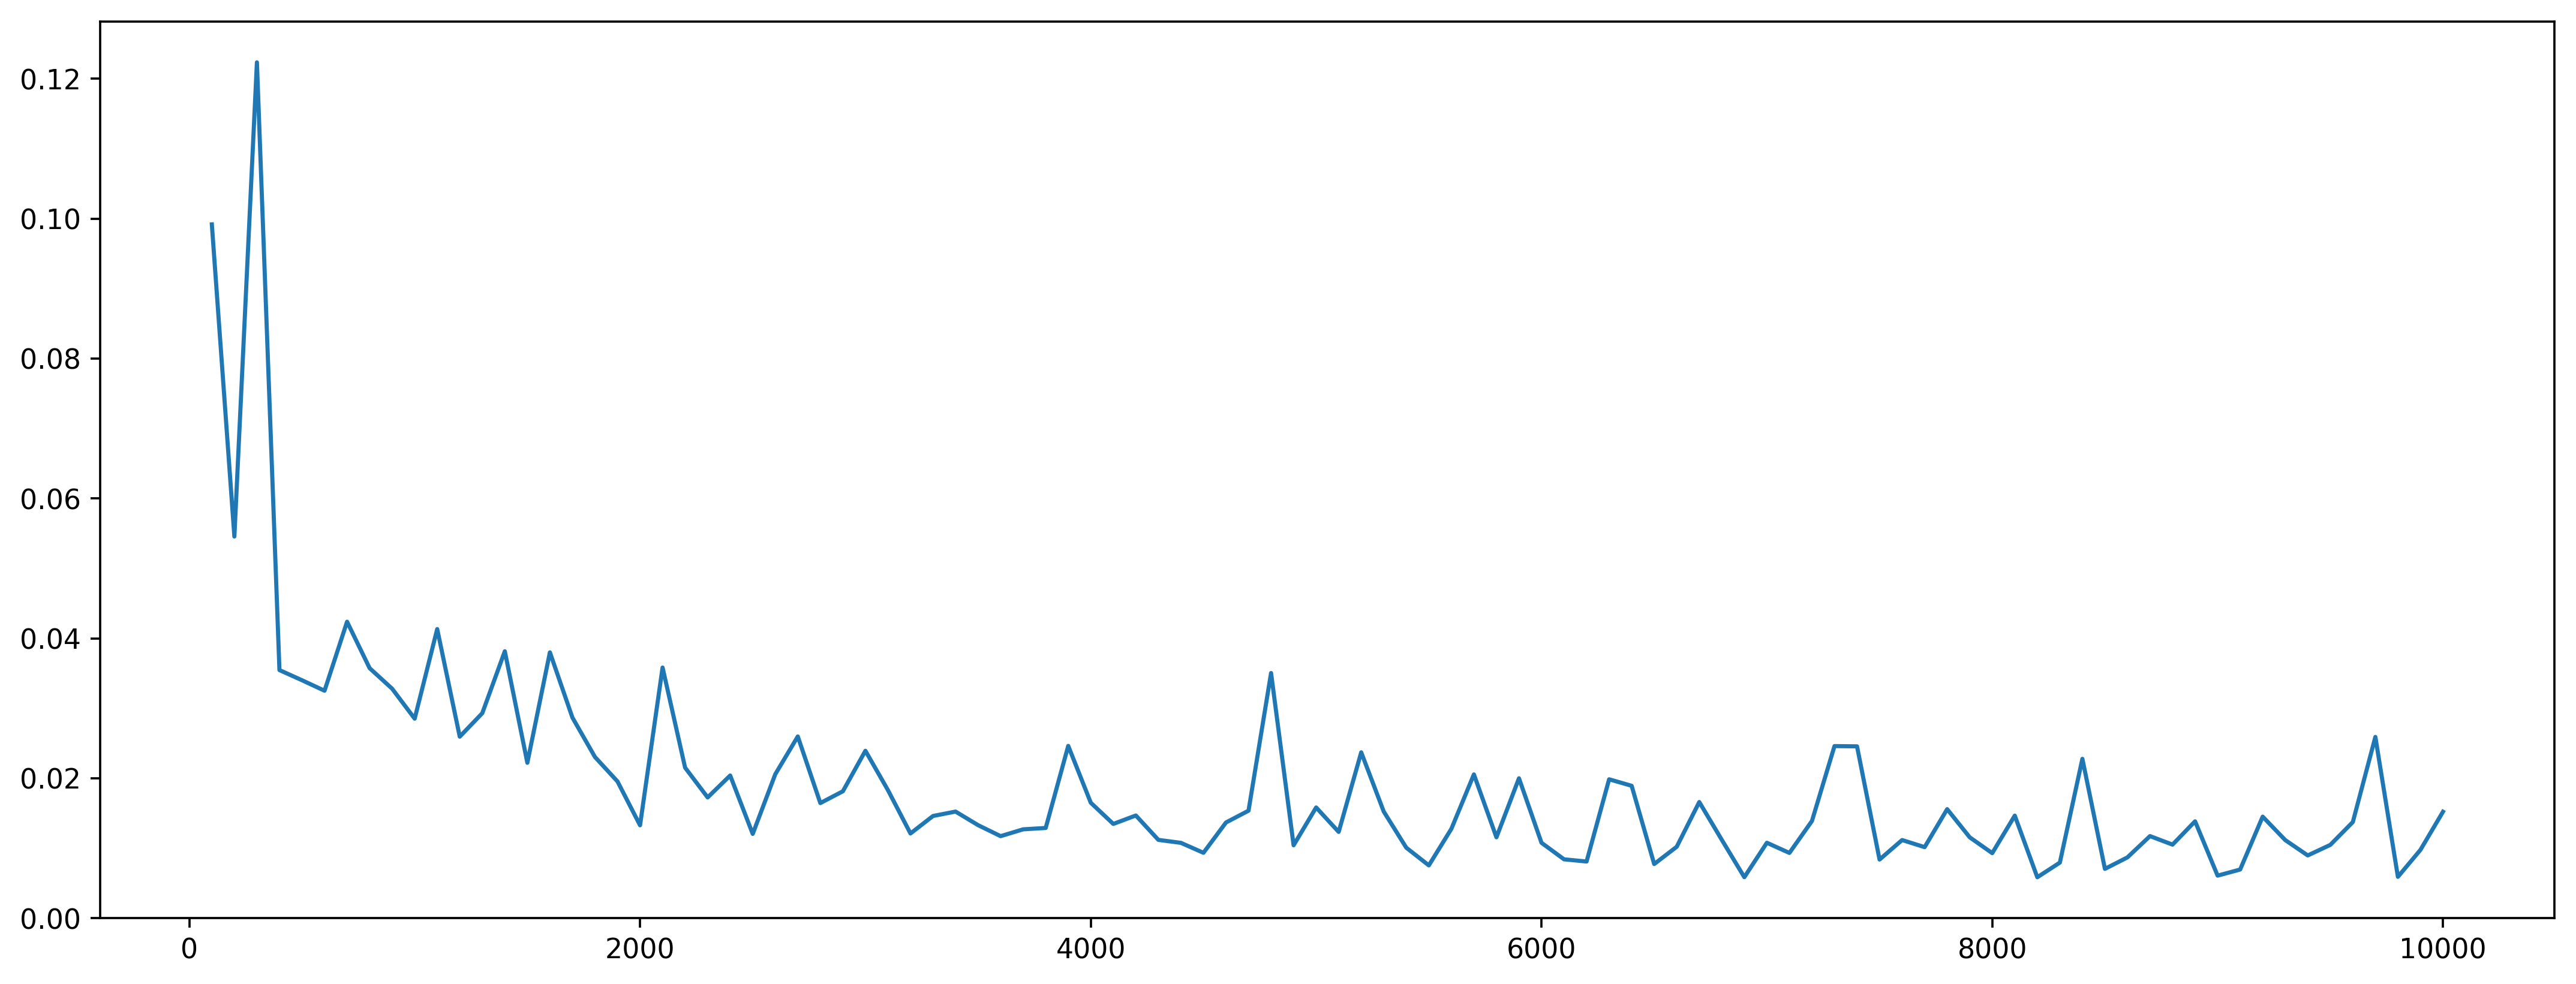

In [24]:
plt.figure(figsize=(16, 6), dpi=330)
plt.plot(N_range, avg_err)
plt.show()